## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

import statsmodels.api         as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (dataXid)

In [342]:
df = pd.read_csv("/mnt/workstation/data/DataXid_full_ok.csv")
df
#PCA = pd.read_csv("/mnt/workstation/data/PCA.csv")

,id_cli,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,...,ciudad_residencia_tag_ingreso_nompen,rep_calif_cred_tag_ingreso_nompen,genero_tag,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero
0,2089776.0,36,0,0,0,0,0.000000e+00,10,1.0,0.0,...,1178.0,6.0,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M
1,2088434.0,33,3,0,0,0,0.000000e+00,10,1.0,0.0,...,966.0,5.0,1,UNION LIBRE,UNIVERSITARIO,VETERINARIA,Independiente,SANDONA,D,F
2,2088089.0,34,1,0,0,0,0.000000e+00,8230,1.0,0.0,...,1192.0,6.0,2,UNION LIBRE,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,TENERIFE,C,M
3,4780572.0,27,1,0,0,0,1.328622e+07,10,1.0,0.0,...,616.0,5.0,2,SOLTERO,BACHILLER,OTROS,Empleado,PEDRAZA,D,M
4,3894402.0,29,1,0,0,0,0.000000e+00,1410,1.0,0.0,...,616.0,6.0,2,SOLTERO,TECNOLOGO,DISEÑO Y PUBLICIDAD,Independiente,PEDRAZA,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,2892117.0,36,0,0,0,0,3.375928e+06,4724,1.0,0.0,...,616.0,6.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Comerciante,PEDRAZA,F,M
1047951,4772894.0,34,1,0,0,0,0.000000e+00,8299,1.0,0.0,...,616.0,6.0,1,SOLTERO,UNIVERSITARIO,MERCADOTECNIA,Independiente,PEDRAZA,C,F
1047952,4774849.0,25,0,0,0,0,0.000000e+00,10,1.0,0.0,...,616.0,5.0,1,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Empleado,PEDRAZA,D,F
1047953,3895049.0,30,0,0,0,0,1.922503e+06,10,1.0,0.0,...,1117.0,2.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Empleado,ARMENIA,H,M


In [206]:
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)
df = df.drop(['ind_mora_vigente'], axis=1)
df = df.drop(['cartera_castigada'], axis=1)

In [207]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [208]:
features_f

Index(['cupo_total_tc', 'ctas_activas', 'ctas_embargadas', 'mediana_nom3',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'pol_centr_ext', 'saldo_prom3_tdc_mdo', 'cupo_tc_mdo',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar', 'estado_civil_tag_ind',
       'nivel_academico_tag_ind', 'profesion_tag_ind', 'ocupacion_tag_ind',
       'ciudad_residencia_tag_ind', 'rep_calif_cred_tag_ind',
       'estado_civil_tag_gasto_familiar', 'nivel_academico_tag_gasto_familiar',
       'profesion_tag_gasto_familiar', 'ocupacion_tag_gasto_familiar',
       'ciudad_residencia_tag_gasto_familiar',
       'rep_calif_cred_tag_gasto_familiar', 'estado_civil_tag_ingreso_nompen',
       'nivel_academico_tag_ingreso_nompen', 'profesion_tag_ingreso_nompen',
       'ocupacion_tag_ingr

In [209]:
features_i

Index(['edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'codigo_ciiu', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cant_oblig_tot_sf',
       'cant_cast_ult_12m_sr', 'genero_tag'],
      dtype='object')

In [210]:
feature_num = features_f.append(features_i)
feature_num

Index(['cupo_total_tc', 'ctas_activas', 'ctas_embargadas', 'mediana_nom3',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'pol_centr_ext', 'saldo_prom3_tdc_mdo', 'cupo_tc_mdo',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar', 'estado_civil_tag_ind',
       'nivel_academico_tag_ind', 'profesion_tag_ind', 'ocupacion_tag_ind',
       'ciudad_residencia_tag_ind', 'rep_calif_cred_tag_ind',
       'estado_civil_tag_gasto_familiar', 'nivel_academico_tag_gasto_familiar',
       'profesion_tag_gasto_familiar', 'ocupacion_tag_gasto_familiar',
       'ciudad_residencia_tag_gasto_familiar',
       'rep_calif_cred_tag_gasto_familiar', 'estado_civil_tag_ingreso_nompen',
       'nivel_academico_tag_ingreso_nompen', 'profesion_tag_ingreso_nompen',
       'ocupacion_tag_ingr

In [211]:
df[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil,1047955,5,SOLTERO,482249
nivel_academico,1047955,6,UNIVERSITARIO,574574
profesion,1047955,79,OTROS,296452
ocupacion,1047955,10,Empleado,664455
ciudad_residencia,1047955,899,PEDRAZA,266005
rep_calif_cred,1047955,8,A,221248
genero,1047955,2,M,530231


## Correlation

Text(0.5, 1.0, 'Correlación de variables numericas')

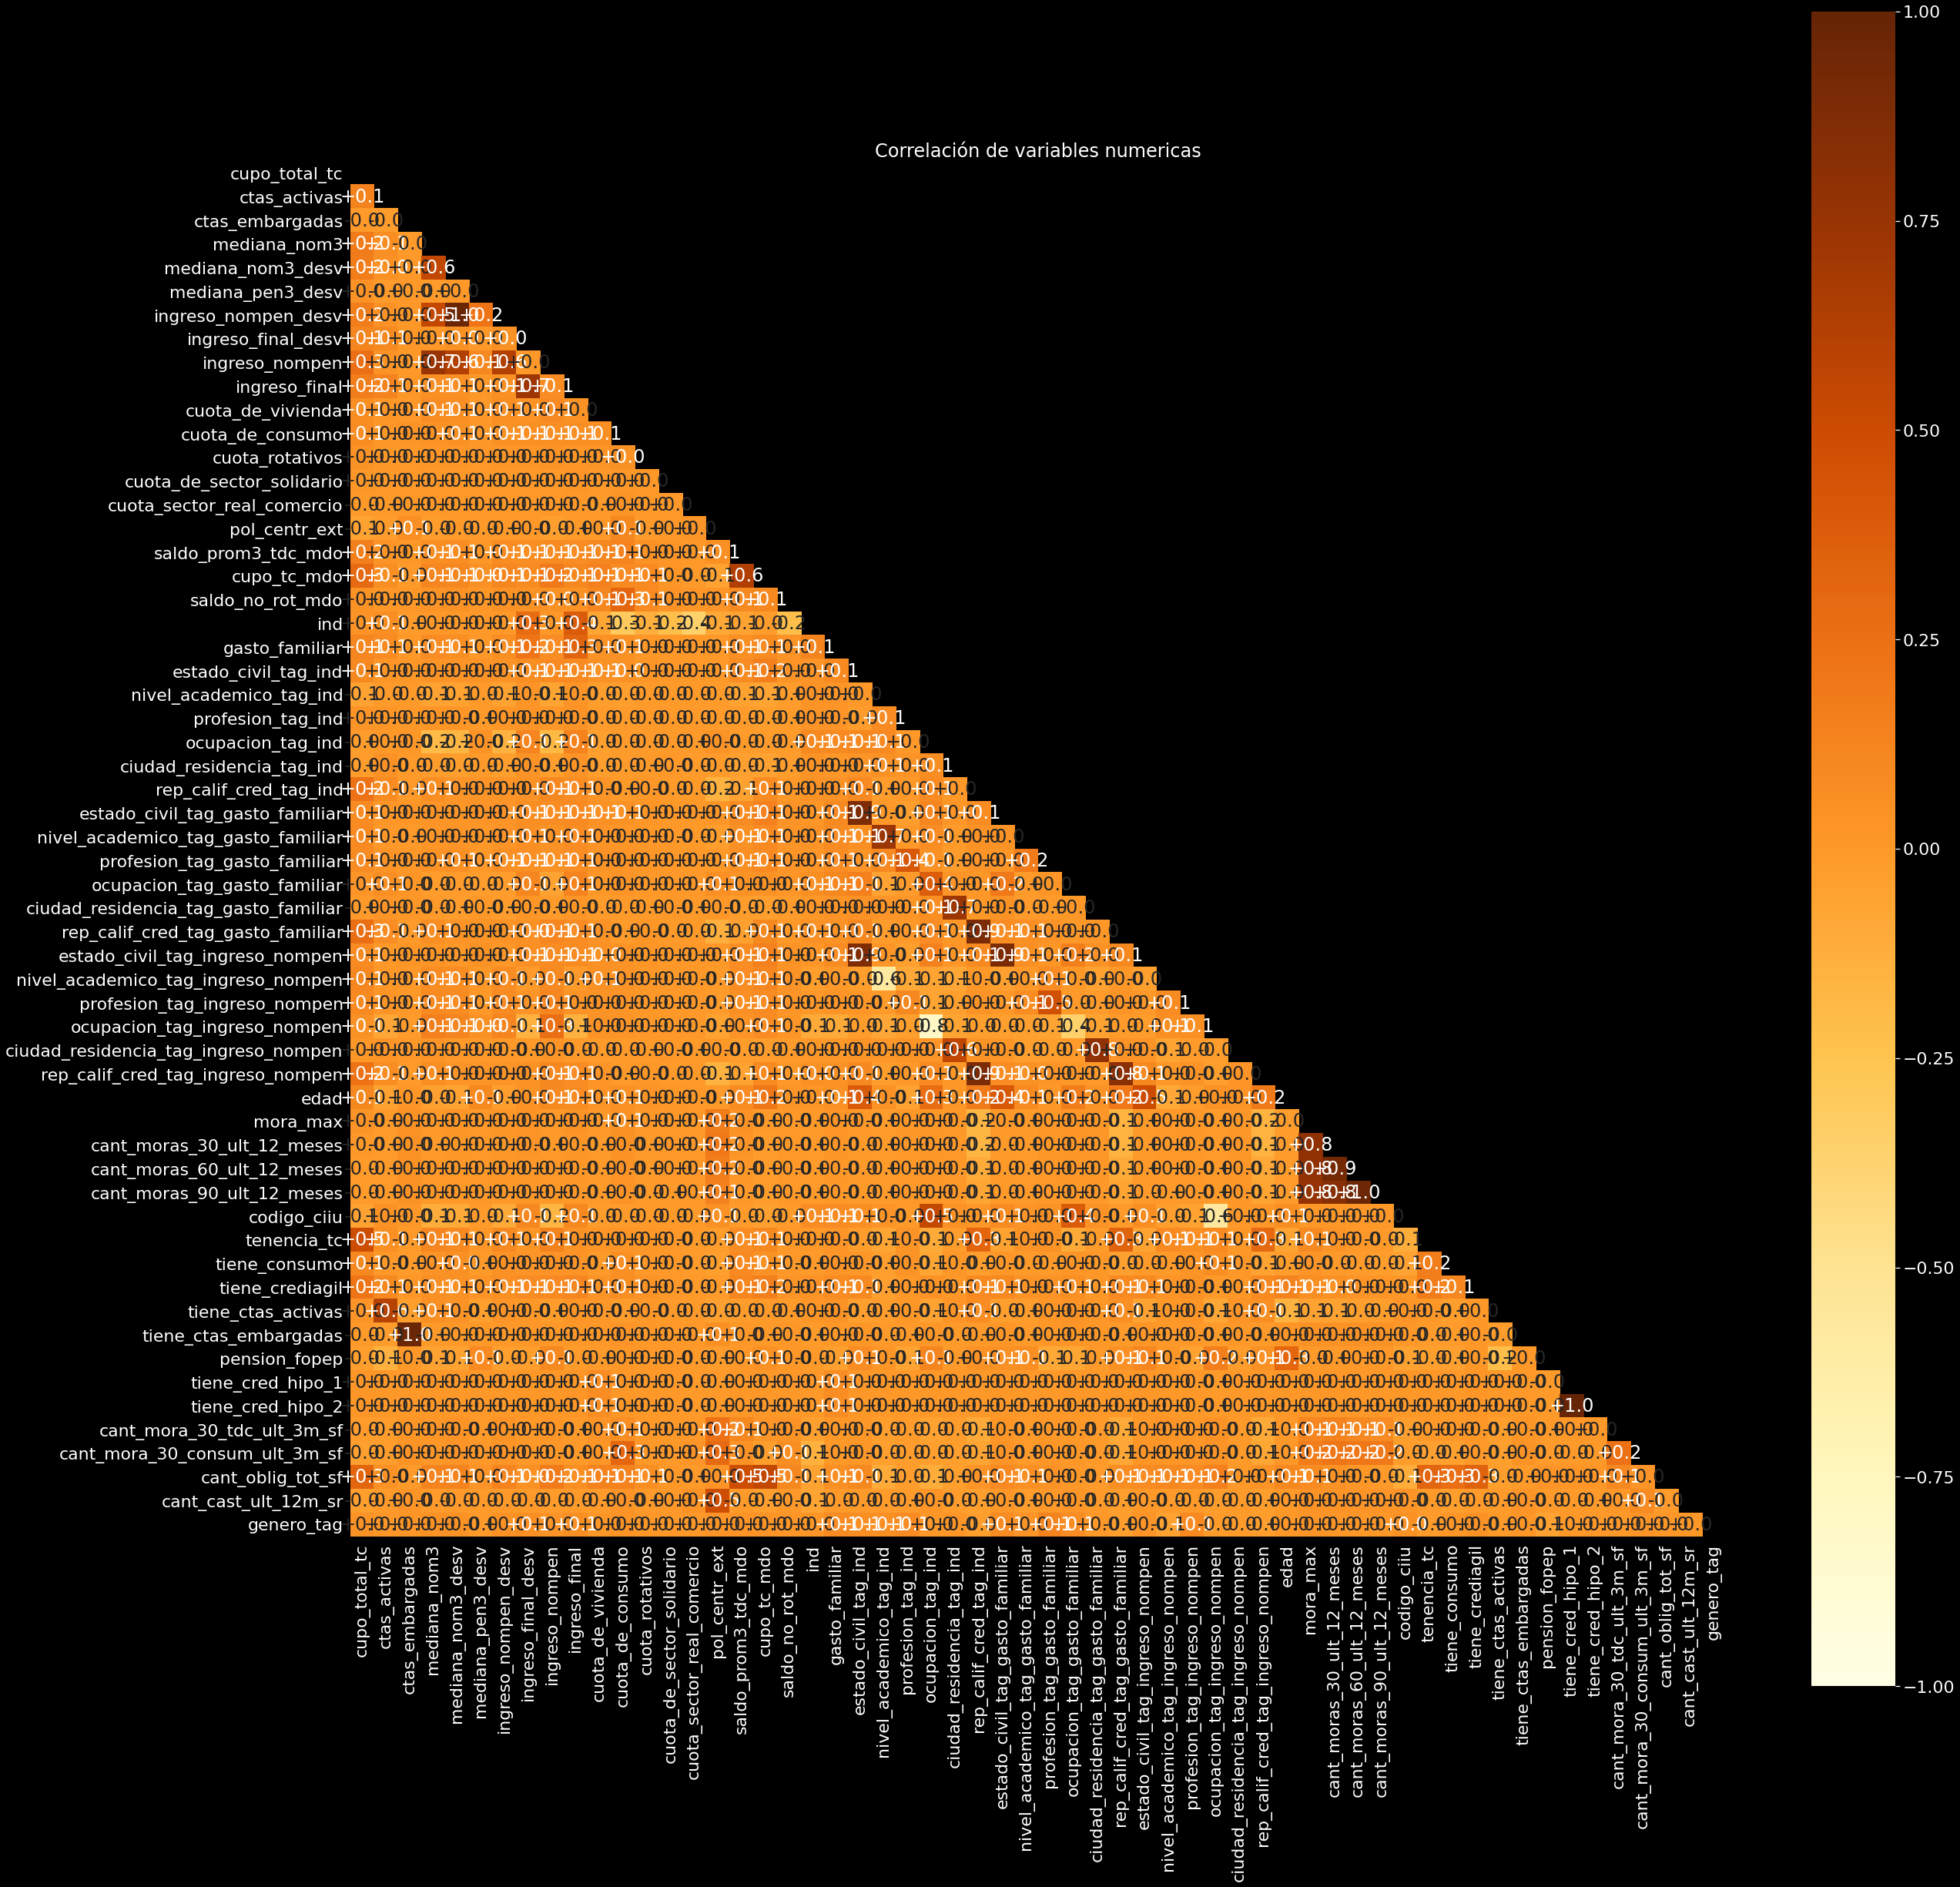

In [215]:
#plt.rcParams.update({'font.size': 13})
#compute correlation matrix
df_correlations = df[list(feature_num)].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=2)
plt.style.use("dark_background")
plt.figure(figsize= (40,40))
sns.heatmap(df_correlations, mask=mask, cmap="YlOrBr",#"RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1,
    fmt="+.1f")
plt.title("Correlación de variables numericas")

In [229]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1]
strong_pairs = pd.DataFrame(strong_pairs)
strong_pairs.columns = ['Correlation']
strong_pairs.drop_duplicates(subset=['Correlation'],inplace = True)
strong_pairs.reset_index(inplace=True)
strong_pairs

,level_0,level_1,Correlation
0,mediana_nom3_desv,ingreso_nompen_desv,0.973695
1,ctas_embargadas,tiene_ctas_embargadas,0.966749
2,cant_moras_90_ult_12_meses,cant_moras_60_ult_12_meses,0.962090
3,cant_moras_60_ult_12_meses,cant_moras_30_ult_12_meses,0.924685
4,rep_calif_cred_tag_ind,rep_calif_cred_tag_ingreso_nompen,0.896581
5,rep_calif_cred_tag_gasto_familiar,rep_calif_cred_tag_ind,0.895457
6,estado_civil_tag_ingreso_nompen,estado_civil_tag_gasto_familiar,0.885107
7,estado_civil_tag_gasto_familiar,estado_civil_tag_ind,0.878640
8,estado_civil_tag_ind,estado_civil_tag_ingreso_nompen,0.873487
9,cant_moras_30_ult_12_meses,cant_moras_90_ult_12_meses,0.842765


# Vs Gasto familiar

In [230]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
high_cor = sorted_pairs[abs(sorted_pairs) < 2]
high_cor = pd.DataFrame(high_cor)
high_cor.columns = ['Correlation']
high_cor.drop_duplicates(subset=['Correlation'],inplace = True)
high_cor.reset_index(inplace=True)
high_cor = high_cor[high_cor['level_1'] == 'gasto_familiar']
high_cor.columns = ['level_0', 'level_key', 'Correlation']
level_uno = high_cor[['level_key','level_0', 'Correlation']]

In [231]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
high_cor = sorted_pairs[abs(sorted_pairs) < 2]
high_cor = pd.DataFrame(high_cor)
high_cor.columns = ['Correlation']
high_cor.drop_duplicates(subset=['Correlation'],inplace = True)
high_cor.reset_index(inplace=True)
high_cor = high_cor[high_cor['level_0'] == 'gasto_familiar']
level_cero = high_cor
#level_cero = pd.DataFrame(columns = ['level_0', 'level_1', 'Correlation'],data=high_cor)
level_cero.columns = ['level_key','level_0', 'Correlation']

In [232]:
corr_gasto_familiar = level_uno.append(level_cero)
corr_gasto_familiar['Correlation'] = [abs(x) for x in corr_gasto_familiar['Correlation']]
corr_gasto_familiar.sort_values(by='Correlation',inplace=True, ascending = False)
corr_gasto_familiar

,level_key,level_0,Correlation
42,gasto_familiar,ingreso_final,0.331155
63,gasto_familiar,ingreso_final_desv,0.223723
110,gasto_familiar,ind,0.130278
123,gasto_familiar,cupo_total_tc,0.116166
140,gasto_familiar,ocupacion_tag_gasto_familiar,0.106586
1561,gasto_familiar,ocupacion_tag_ingreso_nompen,0.101351
180,gasto_familiar,estado_civil_tag_gasto_familiar,0.094647
194,gasto_familiar,estado_civil_tag_ind,0.089567
203,gasto_familiar,ocupacion_tag_ind,0.086896
212,gasto_familiar,codigo_ciiu,0.084997


## Tie Break (by best cor gasto_familiar)

In [234]:
to_delete = []

for i in strong_pairs.index:
    if corr_gasto_familiar[corr_gasto_familiar['level_0'] == strong_pairs.loc[i,'level_0']].index > corr_gasto_familiar[corr_gasto_familiar['level_0'] == strong_pairs.loc[i,'level_1']].index:
        to_delete.append(strong_pairs.loc[i,'level_0'])
    else:
        to_delete.append(strong_pairs.loc[i,'level_1'])
        
to_delete

['ingreso_nompen_desv',
 'tiene_ctas_embargadas',
 'cant_moras_90_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'rep_calif_cred_tag_ingreso_nompen',
 'rep_calif_cred_tag_ind',
 'estado_civil_tag_ingreso_nompen',
 'estado_civil_tag_ind',
 'estado_civil_tag_ingreso_nompen',
 'cant_moras_90_ult_12_meses',
 'rep_calif_cred_tag_ingreso_nompen',
 'cant_moras_30_ult_12_meses',
 'ciudad_residencia_tag_ingreso_nompen',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'ingreso_nompen',
 'nivel_academico_tag_ind',
 'ciudad_residencia_tag_ind',
 'ingreso_final_desv',
 'saldo_prom3_tdc_mdo',
 'ingreso_nompen_desv',
 'mediana_nom3_desv',
 'tiene_ctas_activas',
 'ciudad_residencia_tag_ingreso_nompen',
 'mediana_nom3_desv',
 'cant_oblig_tot_sf',
 'codigo_ciiu',
 'ingreso_nompen_desv',
 'ocupacion_tag_ingreso_nompen',
 'nivel_academico_tag_ingreso_nompen',
 'ocupacion_tag_ingreso_nompen']

In [235]:
len(to_delete)

31

to_delete = ['mediana_pen3_desv',
             'cant_moras_60_ult_12_meses',
            'cant_moras_90_ult_12_meses',
            'cant_moras_30_ult_12_meses',
            'ingreso_nompen',
            'ingreso_final_desv',
            'mediana_nom3',
            'mediana_nom3_desv',
            'saldo_prom3_tdc_mdo',
            'cant_oblig_tot_sf',
            'estado_civil',
            'profesion',
             'ocupacion',
             'ciudad_residencia',
             'genero',
             'rep_calif_cred'
            ]

pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.rename(columns = {'genero_tag':'genero_num'},inplace=True)
indices = df.columns.str.extract(r"(_gasto_familiar)").dropna().index
df_var = df.iloc[:,indices]
indices2 = df.columns.str.extract(r"(tag)").isna()[0].to_list()
df_indices2 = df.loc[:,indices2]
df_final = pd.concat([df_indices2,df_var],axis=1)
df_final.head(30)

## 1. LM with  all variables no correlated

In [347]:
X = df.columns[~df.columns.isin(to_delete)]
y = 'gasto_familiar'

In [348]:
df[X].shape

(1047955, 47)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)

In [242]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

'gasto_familiar ~ edad + mora_max + cupo_total_tc + ctas_activas + ctas_embargadas + mediana_nom3 + tenencia_tc + tiene_consumo + tiene_crediagil + pension_fopep + tiene_cred_hipo_1 + tiene_cred_hipo_2 + cant_mora_30_tdc_ult_3m_sf + cant_mora_30_consum_ult_3m_sf + mediana_pen3_desv + ingreso_final + cuota_de_vivienda + cuota_de_consumo + cuota_rotativos + cuota_de_sector_solidario + cuota_sector_real_comercio + pol_centr_ext + cupo_tc_mdo + cant_cast_ult_12m_sr + saldo_no_rot_mdo + ind + profesion_tag_ind + ocupacion_tag_ind + estado_civil_tag_gasto_familiar + nivel_academico_tag_gasto_familiar + profesion_tag_gasto_familiar + ocupacion_tag_gasto_familiar + ciudad_residencia_tag_gasto_familiar + rep_calif_cred_tag_gasto_familiar + profesion_tag_ingreso_nompen + genero_tag + estado_civil + nivel_academico + profesion + ocupacion + ciudad_residencia + rep_calif_cred + genero'

In [243]:
ml = smf.ols(formula, data = X_train).fit()
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:         gasto_familiar   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     131.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:50:53   Log-Likelihood:            -1.1160e+07
No. Observations:              733568   AIC:                         2.232e+07
Df Residuals:                  732593   BIC:                         2.233e+07
Df Model:                         974                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [349]:
df[X].shape[1]

47

In [382]:
best_pvalues = ml.pvalues[ml.pvalues < 0.05/(df[X].shape[1]-1)].sort_values()
best_pvalues = pd.DataFrame(best_pvalues)
best_pvalues.reset_index(inplace=True)
best_pvalues[['Variable','Categoria']] = best_pvalues['index'].str.split("[",expand=True)
to_continue = best_pvalues[best_pvalues['Variable']!= 'Intercept']['Variable'].unique()
list(to_continue)

['ind',
 'mediana_nom3',
 'tiene_cred_hipo_1',
 'cupo_total_tc',
 'tiene_cred_hipo_2',
 'rep_calif_cred',
 'ingreso_final',
 'cuota_de_consumo',
 'ctas_activas',
 'cuota_sector_real_comercio',
 'nivel_academico',
 'genero',
 'cuota_de_vivienda',
 'profesion',
 'cupo_tc_mdo',
 'tiene_consumo',
 'cuota_de_sector_solidario',
 'saldo_no_rot_mdo',
 'tenencia_tc',
 'tiene_crediagil',
 'ciudad_residencia_tag_gasto_familiar',
 'ocupacion',
 'ciudad_residencia',
 'estado_civil',
 'ocupacion_tag_gasto_familiar',
 'cuota_rotativos',
 'mora_max',
 'rep_calif_cred_tag_gasto_familiar',
 'cant_mora_30_tdc_ult_3m_sf',
 'profesion_tag_gasto_familiar',
 'pension_fopep',
 'ocupacion_tag_ind',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_ingreso_nompen']

## 2. LM with Best p-Value variables

In [383]:
X = ['ind',
    'mediana_nom3',
    'tiene_cred_hipo_1',
    'cupo_total_tc',
    'tiene_cred_hipo_2',
    'rep_calif_cred',
    'ingreso_final',
    'cuota_de_consumo',
    'ctas_activas',
    'cuota_sector_real_comercio',
    'nivel_academico',
    'genero',
    'cuota_de_vivienda',
    'profesion',
    'cupo_tc_mdo',
    'tiene_consumo',
    'cuota_de_sector_solidario',
    'saldo_no_rot_mdo',
    'tenencia_tc',
    'tiene_crediagil',
    'ciudad_residencia_tag_gasto_familiar',
    'ocupacion',
    'ciudad_residencia',
    'estado_civil',
    'ocupacion_tag_gasto_familiar',
    'cuota_rotativos',
    'mora_max',
    'rep_calif_cred_tag_gasto_familiar',
    'cant_mora_30_tdc_ult_3m_sf',
    'profesion_tag_gasto_familiar',
    'pension_fopep',
    'ocupacion_tag_ind',
    'nivel_academico_tag_gasto_familiar',
    'profesion_tag_ingreso_nompen',
    'gasto_familiar']

In [384]:
#X = pd.DataFrame(to_continue)[0]
y = 'gasto_familiar'

In [385]:
df[X].shape

(1047955, 35)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)

In [387]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

'gasto_familiar ~ ind + mediana_nom3 + tiene_cred_hipo_1 + cupo_total_tc + tiene_cred_hipo_2 + rep_calif_cred + ingreso_final + cuota_de_consumo + ctas_activas + cuota_sector_real_comercio + nivel_academico + genero + cuota_de_vivienda + profesion + cupo_tc_mdo + tiene_consumo + cuota_de_sector_solidario + saldo_no_rot_mdo + tenencia_tc + tiene_crediagil + ciudad_residencia_tag_gasto_familiar + ocupacion + ciudad_residencia + estado_civil + ocupacion_tag_gasto_familiar + cuota_rotativos + mora_max + rep_calif_cred_tag_gasto_familiar + cant_mora_30_tdc_ult_3m_sf + profesion_tag_gasto_familiar + pension_fopep + ocupacion_tag_ind + nivel_academico_tag_gasto_familiar + profesion_tag_ingreso_nompen'

In [388]:
ml_best_pvalues = smf.ols(formula, data = X_train).fit()
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:         gasto_familiar   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     131.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:26:46   Log-Likelihood:            -1.1160e+07
No. Observations:              733568   AIC:                         2.232e+07
Df Residuals:                  732593   BIC:                         2.233e+07
Df Model:                         974                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [389]:
df[X].shape[1]

35

In [391]:
best_pvalues2 = ml.pvalues[ml.pvalues < 0.05/(df[X].shape[1]-1)].sort_values()
best_pvalues2 = pd.DataFrame(best_pvalues2)
best_pvalues2.reset_index(inplace=True)
best_pvalues2[['Variable','Categoria']] = best_pvalues2['index'].str.split("[",expand=True)
to_continue2 = best_pvalues2[best_pvalues2['Variable']!= 'Intercept']['Variable'].unique()
list(to_continue2)

['ind',
 'mediana_nom3',
 'tiene_cred_hipo_1',
 'cupo_total_tc',
 'tiene_cred_hipo_2',
 'rep_calif_cred',
 'ingreso_final',
 'cuota_de_consumo',
 'ctas_activas',
 'cuota_sector_real_comercio',
 'nivel_academico',
 'genero',
 'cuota_de_vivienda',
 'profesion',
 'cupo_tc_mdo',
 'tiene_consumo',
 'cuota_de_sector_solidario',
 'saldo_no_rot_mdo',
 'tenencia_tc',
 'tiene_crediagil',
 'ciudad_residencia_tag_gasto_familiar',
 'ocupacion',
 'ciudad_residencia',
 'estado_civil',
 'ocupacion_tag_gasto_familiar',
 'cuota_rotativos',
 'mora_max',
 'rep_calif_cred_tag_gasto_familiar',
 'cant_mora_30_tdc_ult_3m_sf',
 'profesion_tag_gasto_familiar',
 'pension_fopep',
 'ocupacion_tag_ind',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_ingreso_nompen']

In [394]:
X = pd.DataFrame(data = X, columns=['Selected_variables'])
X

,Selected_variables
0,ind
1,mediana_nom3
2,tiene_cred_hipo_1
3,cupo_total_tc
4,tiene_cred_hipo_2
5,rep_calif_cred
6,ingreso_final
7,cuota_de_consumo
8,ctas_activas
9,cuota_sector_real_comercio


In [395]:
X.to_csv("/mnt/workstation/data/Xid_Variables.csv", index=False)